# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# Data

x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

student_data = pd.DataFrame({'Age': x_values, 'Tardies': y_values})

In [3]:
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

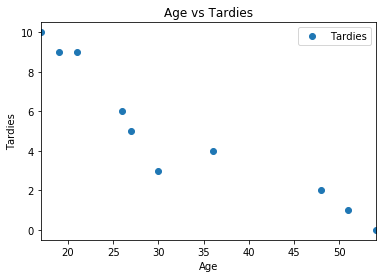

In [4]:
# Your code here.
student_data.plot(x='Age', y='Tardies', style='o')  
plt.title('Age vs Tardies')  
plt.xlabel('Age')  
plt.ylabel('Tardies')  
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 
print('Hypotheses: Young students tend to arrive late more times than old students')

Hypotheses: Young students tend to arrive late more times than old students


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [22]:
# Your response here.
student_cov = student_data.cov()
print(student_cov)

                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


In [24]:
student_corr = student_data.corr()
print(student_corr)

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


In [ ]:
# From the covariance matrix we can see that age and tardies tend to move in the same direction.
# From the correlation matrix we can see that age and tardies are highly negatively correlated

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [25]:
# Your response here.

X = student_data['Age'].values.reshape(-1,1)
y = student_data['Tardies'].values.reshape(-1,1)

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#To retrieve the intercept:
b = regressor.intercept_[0]
#For retrieving the slope:
m = regressor.coef_[0][0]
print(m,b)

-0.2428207709159808 12.888803363135768


Plot your regression model on your scatter plot.

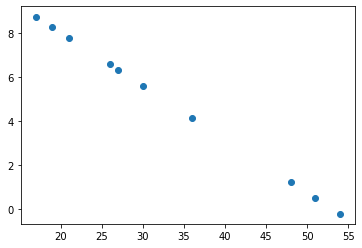

In [31]:
x = student_data['Age']
plt.scatter(x=x, y=m*x+b)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [35]:
# Your response here.

y_pred = regressor.predict(X)
actual_values = np.array(y_values)

df = pd.DataFrame({'Actual': actual_values.flatten(), 
                   'Predicted': y_pred.flatten(), 
                   'MSE': (actual_values.flatten()-y_pred.flatten())**2})
df

,Actual,Predicted,MSE
0,10,8.760850,1.535492
1,1,0.504944,0.245080
2,5,6.332643,1.775936
3,9,7.789567,1.465148
4,4,4.147256,0.021684
5,2,1.233406,0.587666
6,9,8.275209,0.525322
7,6,6.575463,0.331158
8,0,-0.223518,0.049960
9,3,5.604180,6.781755


In [36]:
# We can say there is a linear correlation between age and tardiness

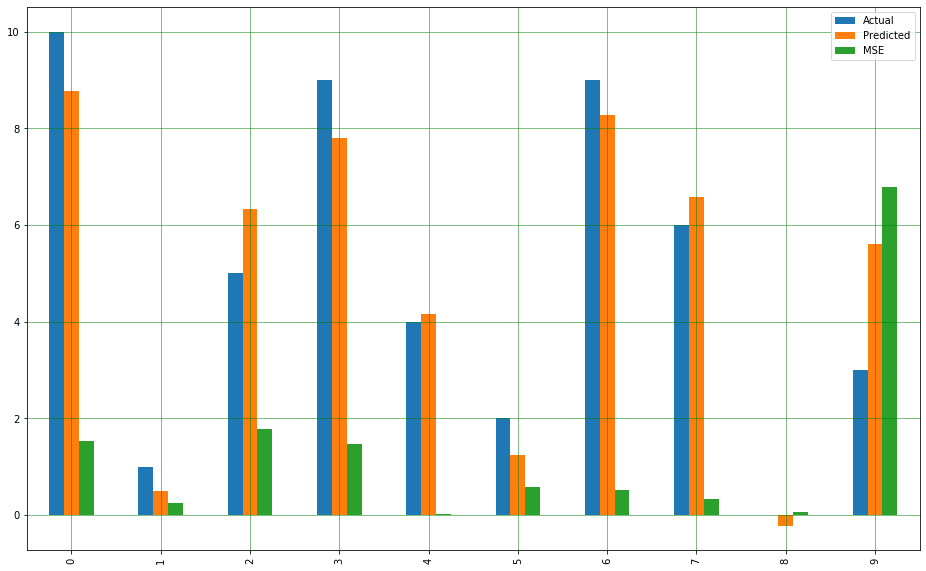

In [37]:
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

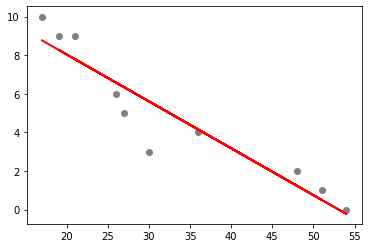

In [11]:
plt.scatter(X, y,  color='gray')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.show()

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [39]:
# Import any libraries you may need & the data

vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [40]:
# Your response here. 
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG']]
y = vehicles['CO2 Emission Grams/Mile']

In [41]:
corr = pd.DataFrame({'A': X.columns, 'B': [vehicles[i].corr(vehicles['CO2 Emission Grams/Mile']) for i in X.columns]})
print(corr)

                   A         B
0               Year -0.222300
1          Cylinders  0.752393
2  Fuel Barrels/Year  0.986189
3       Combined MPG -0.926229


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [42]:
# Your response here. 
import statsmodels.api as sm

model = sm.OLS(y,X)
results = model.fit()
predictions = results.predict(X)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [44]:
# Your response here. 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.920e+06
Date:                     Mon, 06 Apr 2020   Prob (F-statistic):                        0.00
Time:                             19:01:49   Log-Likelihood:                     -1.5422e+05
No. Observations:                    35952   AIC:                                  3.084e+05
Df Residuals:                        35948   BIC:                                  3.085e+05
Df Model:                                4                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0756      0.001     87.627      0.000       0.074       0.077
Cylinders             2.6110      0.079     32.849      0.000       2.455       2.767
Fuel Barrels/Year    21.7250      0.053    413.558      0.000      21.622      21.828
Combined MPG         -3.6959      0.044    -83.877      0.000      -3.782      -3.610
==============================================================================
Omnibus:                    78055.889   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        431949390.894
Skew:                          19.704   Prob(JB):                         0.00
Kurtosis:                     538.535   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 